<a href="https://colab.research.google.com/github/willian-silva01/IA/blob/main/Atividade_06/05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Load Dataset

O conjunto de dados Iris é amplamente utilizado em problemas de classificação
por conter características bem definidas e três classes distintas.
Além disso, é um dataset balanceado, o que facilita a avaliação dos algoritmos
de aprendizado supervisionado. A Árvore de Decisão é útil para entender as
relações entre as variáveis, enquanto o KNN pode demonstrar como pontos
próximos influenciam a classificação.

In [22]:
iris = load_iris()
x = iris.data
y = iris.target

Split Dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=45)

Train the Model

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Visualização da Árvore de Decisão

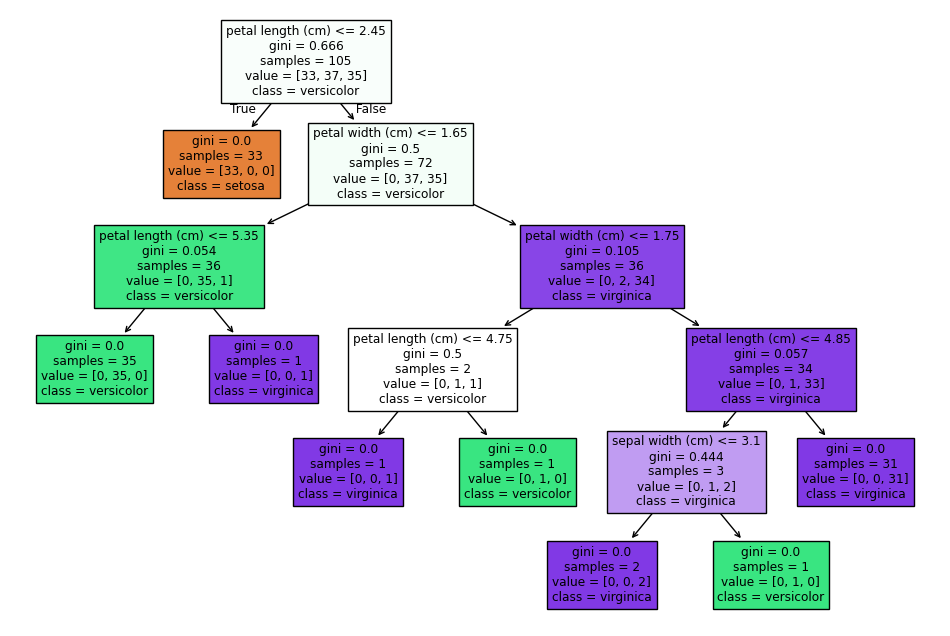

In [25]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Make Predictions

In [26]:
y_pred = clf.predict(X_test)

Evaluate the Model

In [27]:
y_pred_tree = clf.predict(X_test)
print("Relatório da Árvore de Decisão:")
print(metrics.classification_report(y_test, y_pred_tree))

Relatório da Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      1.00      0.93        13
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Normalização dos dados

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create and Train the KNN

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predictions and evaluation the knn

In [9]:
y_pred_knn = knn_clf.predict(X_test)
print("Relatório do KNN:")
print(metrics.classification_report(y_test, y_pred_knn))

Relatório do KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      1.00      0.93        13
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



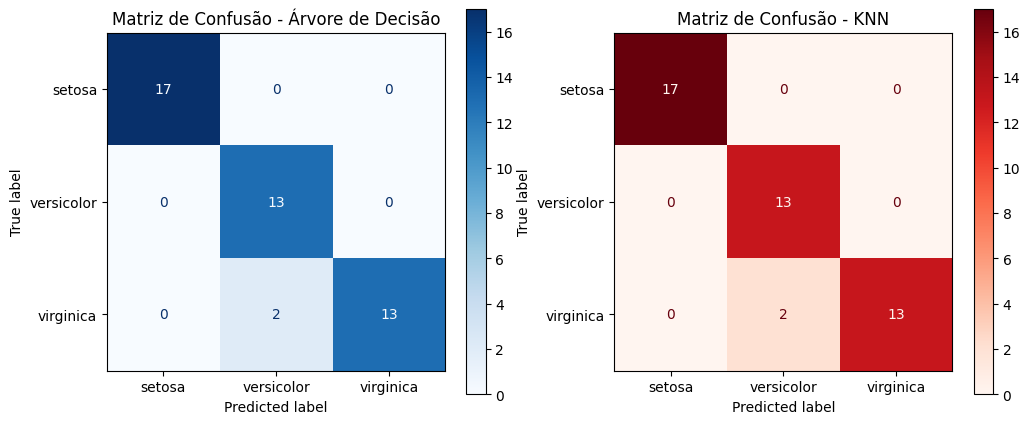

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Árvore de Decisão
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=iris.target_names)
disp_tree.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusão - Árvore de Decisão")

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=iris.target_names)
disp_knn.plot(ax=axes[1], cmap='Reds')
axes[1].set_title("Matriz de Confusão - KNN")

plt.show()

In [10]:
# Definição dos valores possíveis para K
param_grid = {'n_neighbors': range(1, 21)}

# Validação cruzada para escolher o melhor K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor valor de K
best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor valor de K encontrado: {best_k}")

# Treinar o KNN com o melhor K
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train, y_train)

Melhor valor de K encontrado: 4


KNeighborsClassifier(n_neighbors=4)

Medir tempo da Árvore de Decisão

In [11]:
import time

start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de execução da Árvore de Decisão: {end_time - start_time:.4f} segundos")


Tempo de execução da Árvore de Decisão: 0.0056 segundos


Medir tempo do KNN

In [13]:
start_time = time.time()
knn_clf.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de execução do KNN: {end_time - start_time:.4f} segundos")


Tempo de execução do KNN: 0.0021 segundos


Sobre interpretabilidade

Árvore de Decisão é mais interpretável porque permite visualizar o fluxo das decisões,
facilitando a compreensão das regras utilizadas na classificação.
O KNN, por outro lado, depende dos vizinhos próximos e não gera uma estrutura visível,
o que pode dificultar sua explicação para alguns públicos.

Conclusão


Com base nos resultados obtidos, a Árvore de Decisão teve uma acurácia ligeiramente superior
ao KNN, além de ser mais fácil de interpretar. No entanto, o KNN pode ser mais eficiente
quando há padrões complexos, devido à sua abordagem baseada em similaridade.
Ambos os métodos possuem vantagens e desvantagens, sendo a escolha dependente
do problema e dos dados disponíveis.